In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
import seaborn as sns
from utils import plot_percentage_bar_chart, plot_normalized_bar_chart, plot_normalized_histogram

In [2]:
df = pd.read_csv('Data/data.csv', encoding='utf-8',
                 dtype={'ORIGIN_FRSHTT': str, 'DEST_FRSHTT': str})

df['TOTAL_DELAY'] = df[['CARRIER_DELAY',
                        'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum(axis=1)

ORIGIN_FRSHTT = df['ORIGIN_FRSHTT'].str.split('', n=6, expand=True)
df['ORIGIN_FOG'] = ORIGIN_FRSHTT[1]
df['ORIGIN_RAIN'] = ORIGIN_FRSHTT[2]
df['ORIGIN_SNOW'] = ORIGIN_FRSHTT[3]
df['ORIGIN_HAIL'] = ORIGIN_FRSHTT[4]
df['ORIGIN_THUNDER'] = ORIGIN_FRSHTT[5]
df['ORIGIN_TORNADO'] = ORIGIN_FRSHTT[6]

DEST_FRSHTT = df['DEST_FRSHTT'].str.split('', n=6, expand=True)
df['DEST_FOG'] = DEST_FRSHTT[1]
df['DEST_RAIN'] = DEST_FRSHTT[2]
df['DEST_SNOW'] = DEST_FRSHTT[3]
df['DEST_HAIL'] = DEST_FRSHTT[4]
df['DEST_THUNDER'] = DEST_FRSHTT[5]
df['DEST_TORNADO'] = DEST_FRSHTT[6]

df.drop(['YEAR', 'FL_DATE', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
         'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
         'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_LAT', 'ORIGIN_LONG', 'ORIGIN_STATION', 'ORIGIN_NAME', 'ORIGIN_FRSHTT',
         'DEST_AIRPORT', 'DEST_CITY', 'DEST_STATE', 'DEST_LAT', 'DEST_LONG', 'DEST_STATION', 'DEST_NAME', 'DEST_FRSHTT',
         'ORIGIN_SLP', 'ORIGIN_STP', 'ORIGIN_SNDP', 'DEST_SLP', 'DEST_STP', 'DEST_SNDP'], axis=1, inplace=True)

df['DAILY_CASES'].fillna(0, inplace=True)
df['TAXI_OUT'].fillna(df.groupby('ORIGIN')[
                      'TAXI_OUT'].transform('median'), inplace=True)
df['TAXI_IN'].fillna(df.groupby('DEST')[
    'TAXI_IN'].transform('median'), inplace=True)

df = df.astype({'CANCELLED': object, 'DIVERTED': object})

In [3]:
cancelled_df = df[df['CANCELLED'] > 0.]
delayed_df = df[df['TOTAL_DELAY'] > 0.]
diverted_df = df[df['DIVERTED'] > 0.]

In [4]:
df.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
         'LATE_AIRCRAFT_DELAY', 'CANCELLATION_CODE'], axis=1, inplace=True)

In [5]:
print(f'Number of cancelled flights: {len(cancelled_df)}')
print(f'Number of delayed flights: {len(delayed_df)}')
print(f'Number of diverted flights: {len(diverted_df)}')
print(f'Number of not cancelled flights: {len(df) - len(cancelled_df)}')
print(f'Number of not delayed flights: {len(df) - len(delayed_df)}')
print(f'Percentage of cancelled flights: {len(cancelled_df) / len(df) * 100}%')
print(f'Percentage of delayed flights: {len(delayed_df) / len(df) * 100}%')

Number of cancelled flights: 273293
Number of delayed flights: 331477
Number of diverted flights: 6103
Number of not cancelled flights: 3327231
Number of not delayed flights: 3269047
Percentage of cancelled flights: 7.590367402078142%
Percentage of delayed flights: 9.206354408413887%


# Cancellation

## Aircraft Carrier

Text(0.5, 0, 'Aircraft Carrier')

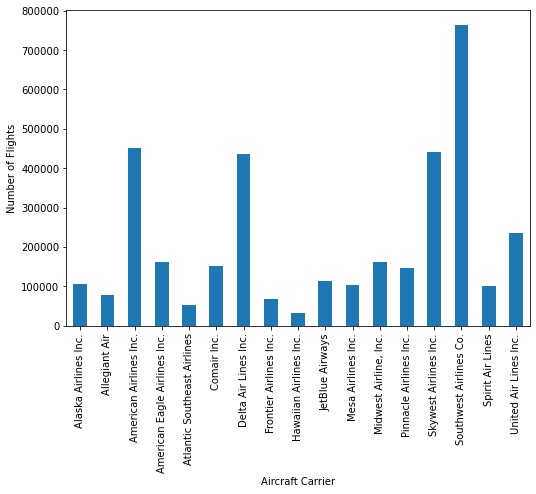

In [6]:
df['OP_UNIQUE_CARRIER'].value_counts(sort=False).sort_index().plot(kind='bar',
                                                                   figsize=(
                                                                       8.3, 5.8),
                                                                   legend=False,
                                                                   rot=90)
plt.ylabel('Number of Flights')
plt.xlabel('Aircraft Carrier')

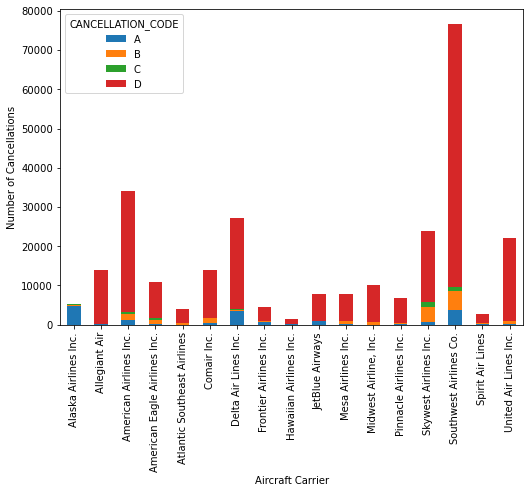

In [7]:
cancelled_df.groupby(['OP_UNIQUE_CARRIER', 'CANCELLATION_CODE']).size().unstack().sort_index().fillna(0).plot(kind='bar',
                                                                                                              figsize=(
                                                                                                                  8.3, 5.8),
                                                                                                              legend=True,
                                                                                                              rot=90,
                                                                                                              stacked=True)
plt.ylabel('Number of Cancellations')
plt.xlabel('Aircraft Carrier')

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join('./imgs', 'Aircraft Carrier Cancelled.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

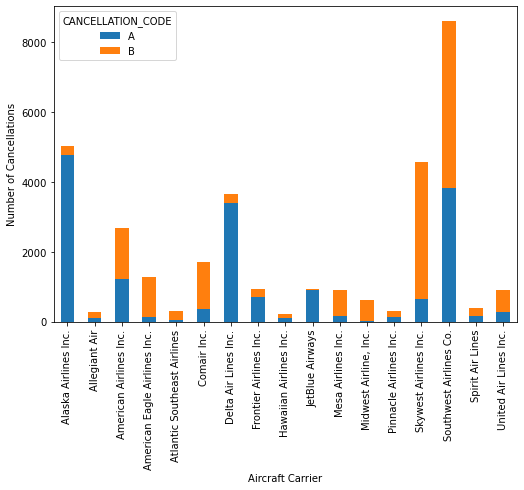

In [8]:
cancelled_df.groupby(['OP_UNIQUE_CARRIER', 'CANCELLATION_CODE']).size().unstack().drop(['C', 'D'], axis=1).sort_index().fillna(0).plot(kind='bar',
                                                                                                                                       figsize=(
                                                                                                                                           8.3, 5.8),
                                                                                                                                       legend=True,
                                                                                                                                       rot=90,
                                                                                                                                       stacked=True)
plt.ylabel('Number of Cancellations')
plt.xlabel('Aircraft Carrier')
img_path = os.path.join('./imgs', 'Minimized Aircraft Carrier Cancelled.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

## Month

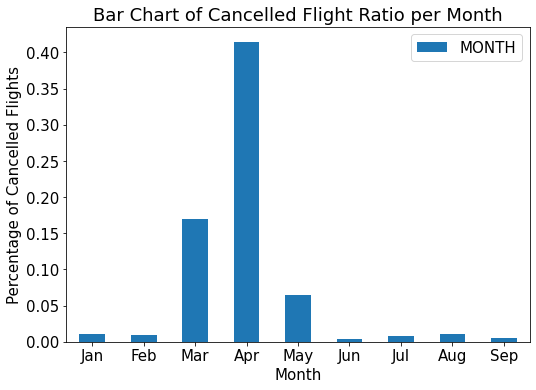

In [9]:
index = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep'
}

plot_percentage_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='MONTH',
                          index=index,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Bar Chart of Cancelled Flight Ratio per Month',
                          xlabel='Month',
                          ylabel='Percentage of Cancelled Flights',
                          save=True,
                          path='./imgs',
                          show=True)

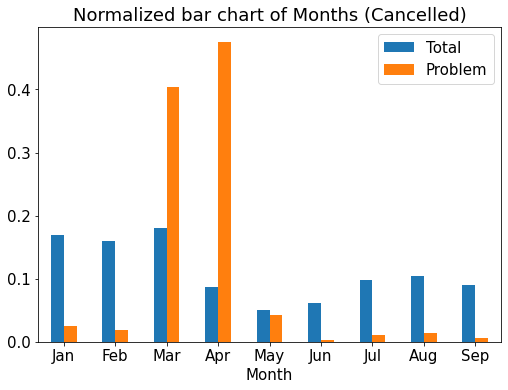

In [10]:
index = [
    'Jan', 'Feb', 'Mar',
    'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep'
]

plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='MONTH',
                          nb_bins=None,
                          index=index,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Months (Cancelled)',
                          xlabel='Month',
                          save=True,
                          path='./imgs',
                          show=True)

## Day of Month

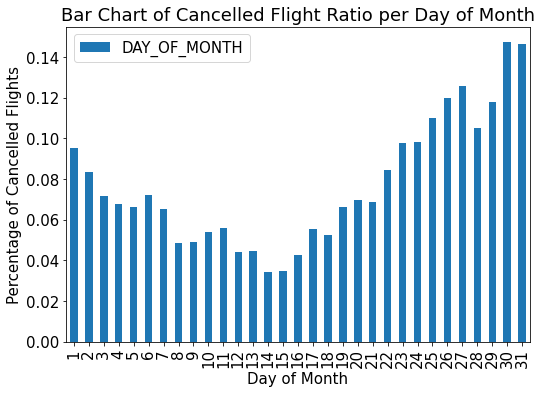

In [11]:
plot_percentage_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='DAY_OF_MONTH',
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=90,
                          title='Bar Chart of Cancelled Flight Ratio per Day of Month',
                          xlabel='Day of Month',
                          ylabel='Percentage of Cancelled Flights',
                          save=True,
                          path='./imgs',
                          show=True)

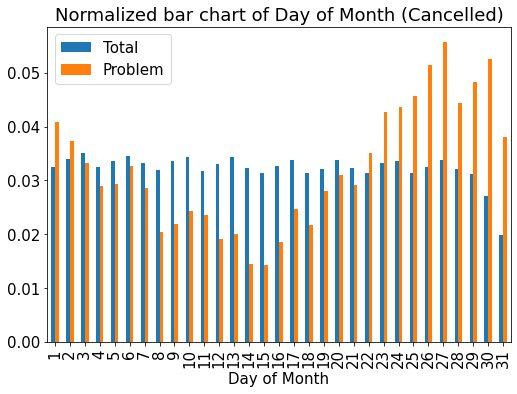

In [12]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='DAY_OF_MONTH',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=90,
                          title='Normalized bar chart of Day of Month (Cancelled)',
                          xlabel='Day of Month',
                          save=True,
                          path='./imgs',
                          show=True)

## Day of Week

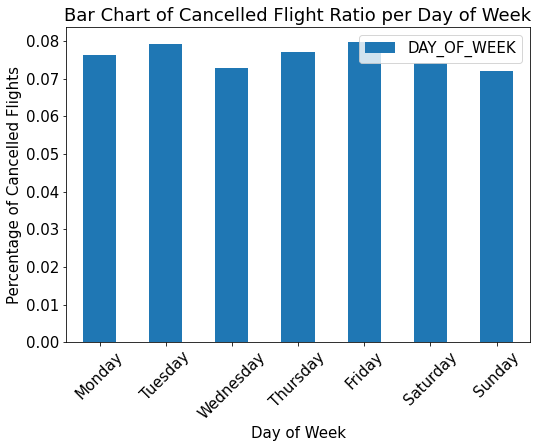

In [13]:
index = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday',
}

plot_percentage_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='DAY_OF_WEEK',
                          index=index,
                          figsize=(8.3, 5.8),
                          rot=45,
                          title='Bar Chart of Cancelled Flight Ratio per Day of Week',
                          xlabel='Day of Week',
                          ylabel='Percentage of Cancelled Flights',
                          save=True,
                          path='./imgs',
                          show=True)

## CRS Departure Time

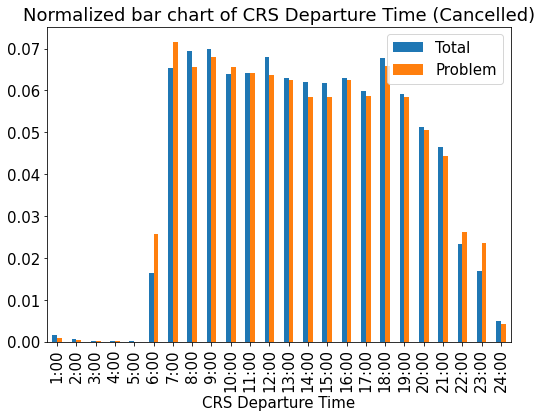

In [14]:
index = ['1:00', '2:00', '3:00', '4:00', '5:00',
         '6:00', '7:00', '8:00', '9:00', '10:00',
         '11:00', '12:00', '13:00', '14:00', '15:00',
         '16:00', '17:00', '18:00', '19:00', '20:00',
         '21:00', '22:00', '23:00', '24:00']

plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='CRS_DEP_TIME',
                          nb_bins=24,
                          index=index,
                          figsize=(8.3, 5.8),
                          rot=90,
                          title='Normalized bar chart of CRS Departure Time (Cancelled)',
                          xlabel='CRS Departure Time',
                          save=True,
                          path='./imgs',
                          show=True)

## CRS Arrival Time

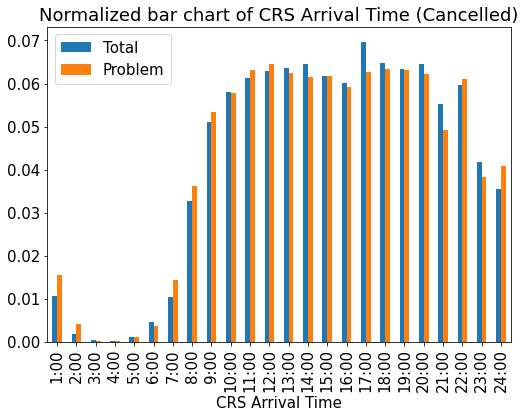

In [15]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='CRS_ARR_TIME',
                          nb_bins=24,
                          index=index,
                          figsize=(8.3, 5.8),
                          rot=90,
                          title='Normalized bar chart of CRS Arrival Time (Cancelled)',
                          xlabel='CRS Arrival Time',
                          save=True,
                          path='./imgs',
                          show=True)

## CRS Elapsed Time

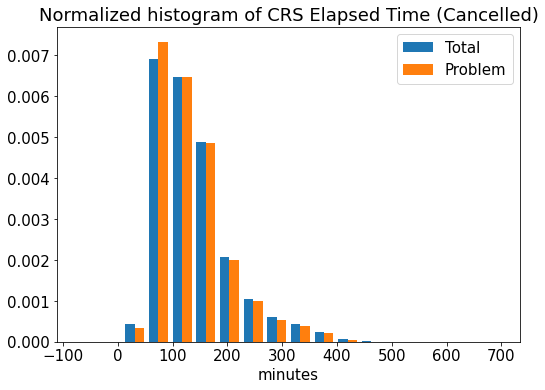

In [16]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='CRS_ELAPSED_TIME',
                          nb_bins=18,
                          vertical_lines=False,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of CRS Elapsed Time (Cancelled)',
                          xlabel='minutes',
                          save=True,
                          path='./imgs',
                          show=True)

## Taxi Out

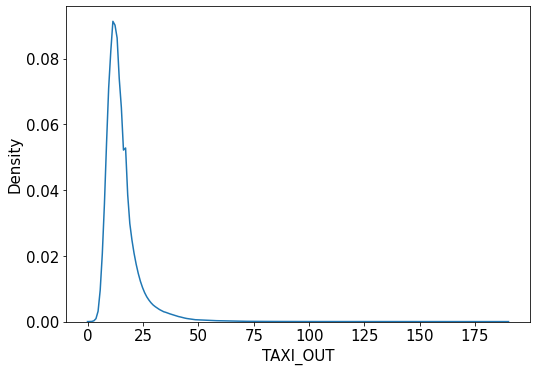

In [17]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df['TAXI_OUT'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Taxi Out Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [18]:
df.drop(df[df['TAXI_OUT'] > 120.].index, inplace=True)
cancelled_df.drop(
    cancelled_df[cancelled_df['TAXI_OUT'] > 120.].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


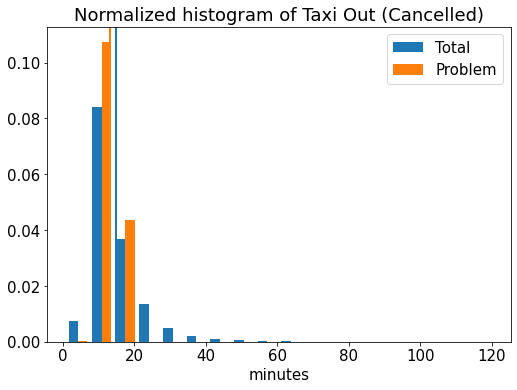

In [19]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='TAXI_OUT',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Taxi Out (Cancelled)',
                          xlabel='minutes',
                          save=True,
                          path='./imgs',
                          show=True)

## Taxi In

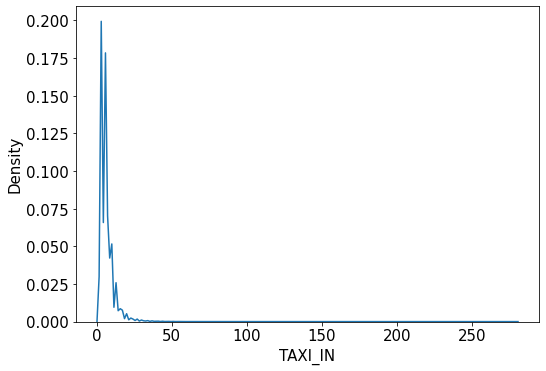

In [20]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df['TAXI_IN'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Taxi In Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [21]:
df.drop(df[df['TAXI_IN'] > 120.].index, inplace=True)
cancelled_df.drop(
    cancelled_df[cancelled_df['TAXI_IN'] > 120.].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


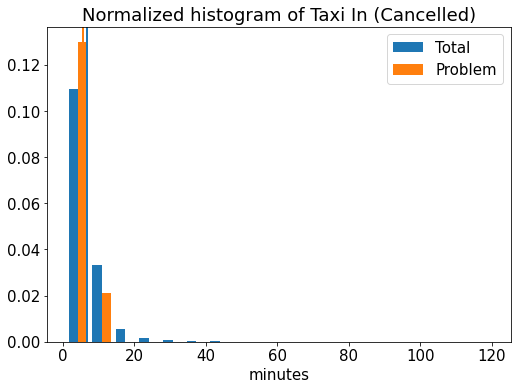

In [22]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='TAXI_IN',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Taxi In (Cancelled)',
                          xlabel='minutes',
                          save=True,
                          path='./imgs',
                          show=True)

## Distance

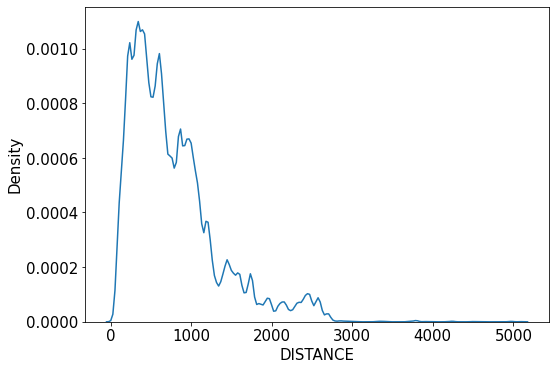

In [23]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df['DISTANCE'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Distance Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [24]:
df.drop(df[df['DISTANCE'] > 5000.].index, inplace=True)
cancelled_df.drop(
    cancelled_df[cancelled_df['DISTANCE'] > 5000.].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


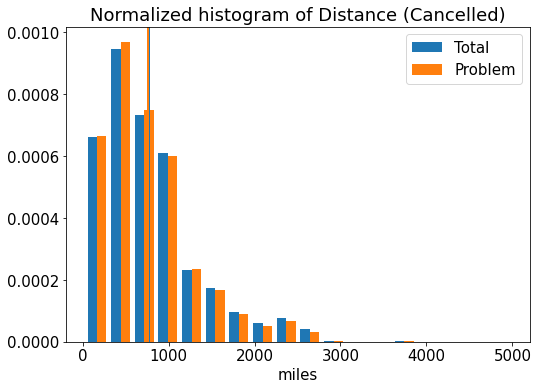

In [25]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='DISTANCE',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Distance (Cancelled)',
                          xlabel='miles',
                          save=True,
                          path='./imgs',
                          show=True)

## Origin Airport Weather

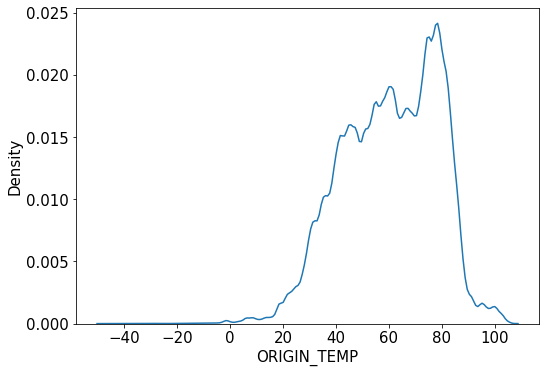

In [26]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df[df['ORIGIN_TEMP'] != 9999.9]['ORIGIN_TEMP'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Origin Airport Temperature Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [27]:
df.drop(df[df['ORIGIN_TEMP'] > 120.].index, inplace=True)
cancelled_df.drop(
    cancelled_df[cancelled_df['ORIGIN_TEMP'] > 120.].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


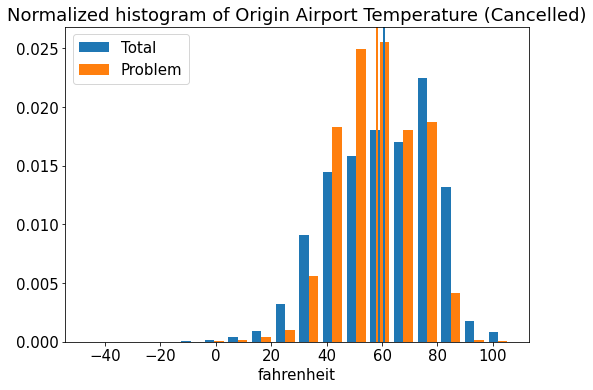

In [28]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='ORIGIN_TEMP',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Origin Airport Temperature (Cancelled)',
                          xlabel='fahrenheit',
                          save=True,
                          path='./imgs',
                          show=True)

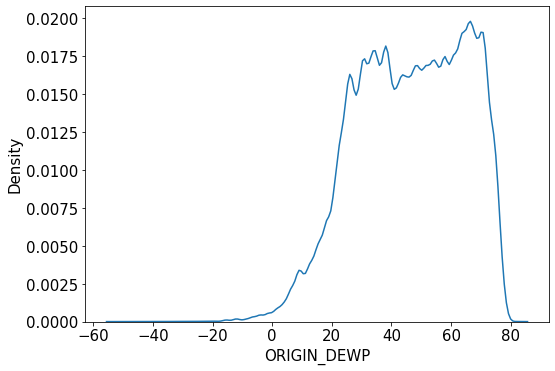

In [29]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df[df['ORIGIN_DEWP'] != 9999.9]['ORIGIN_DEWP'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Origin Airport Dew Point Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [30]:
df.drop(df[df['ORIGIN_DEWP'] > 120.].index, inplace=True)
cancelled_df.drop(
    cancelled_df[cancelled_df['ORIGIN_DEWP'] > 120.].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


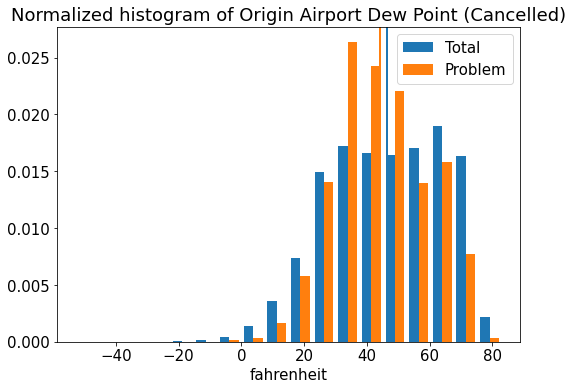

In [31]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='ORIGIN_DEWP',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Origin Airport Dew Point (Cancelled)',
                          xlabel='fahrenheit',
                          save=True,
                          path='./imgs',
                          show=True)

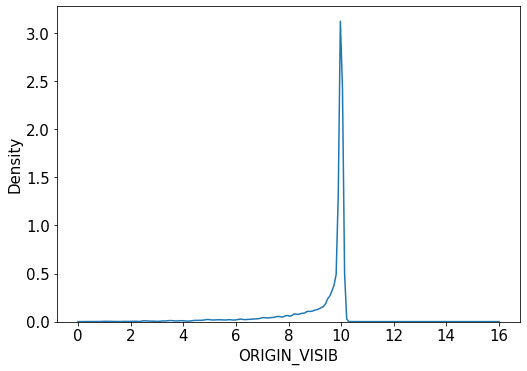

In [32]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df[df['ORIGIN_VISIB'] != 999.9]['ORIGIN_VISIB'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Origin Airport Visibility Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [33]:
df.drop(df[(df['ORIGIN_VISIB'] > 18.) | (
    df['ORIGIN_VISIB'] < 2.)].index, inplace=True)
cancelled_df.drop(cancelled_df[(cancelled_df['ORIGIN_VISIB'] > 18.) | (
    cancelled_df['ORIGIN_VISIB'] < 2.)].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


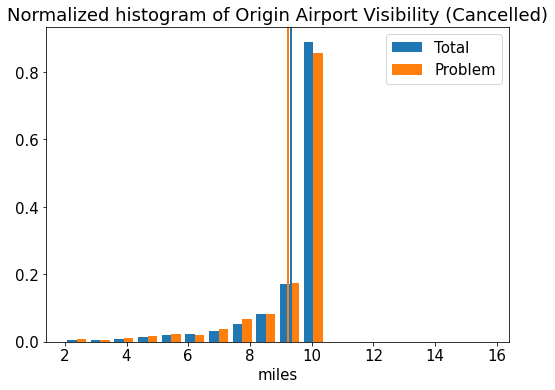

In [34]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='ORIGIN_VISIB',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Origin Airport Visibility (Cancelled)',
                          xlabel='miles',
                          save=True,
                          path='./imgs',
                          show=True)

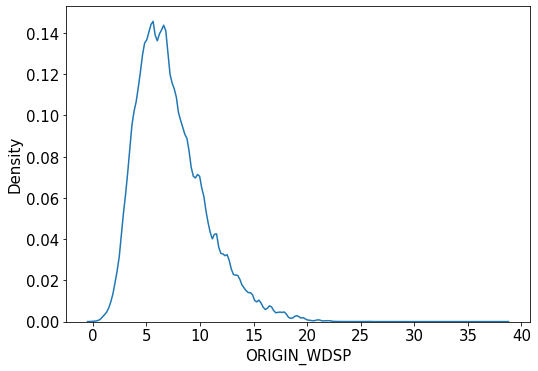

In [35]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df[df['ORIGIN_WDSP'] != 999.9]['ORIGIN_WDSP'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Origin Airport Wind Speed Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [36]:
df.drop(df[df['ORIGIN_WDSP'] > 38.].index, inplace=True)
cancelled_df.drop(
    cancelled_df[cancelled_df['ORIGIN_WDSP'] > 38.].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


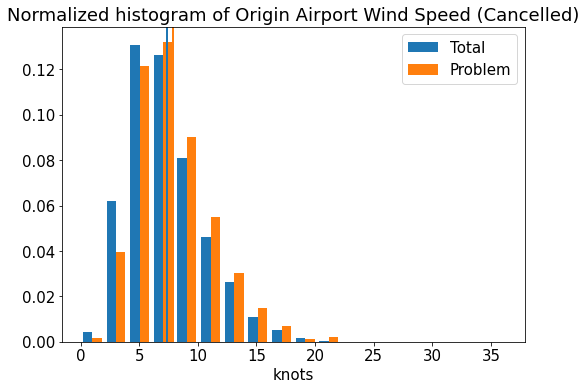

In [37]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='ORIGIN_WDSP',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Origin Airport Wind Speed (Cancelled)',
                          xlabel='knots',
                          save=True,
                          path='./imgs',
                          show=True)

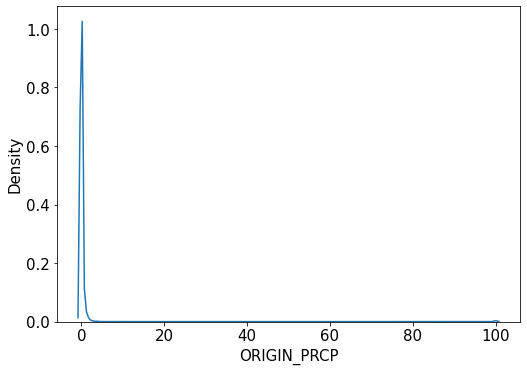

In [38]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df[df['ORIGIN_PRCP'] != 99.9]['ORIGIN_PRCP'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Origin Airport Total precipitation Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [39]:
df.drop(df[df['ORIGIN_PRCP'] > 88.].index, inplace=True)
cancelled_df.drop(
    cancelled_df[cancelled_df['ORIGIN_PRCP'] > 88.].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


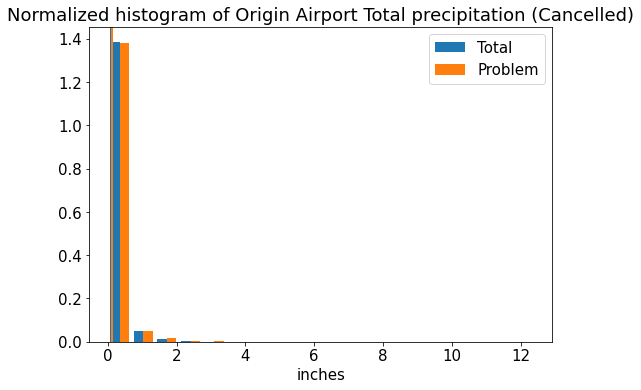

In [40]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='ORIGIN_PRCP',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Origin Airport Total precipitation (Cancelled)',
                          xlabel='inches',
                          save=True,
                          path='./imgs',
                          show=True)

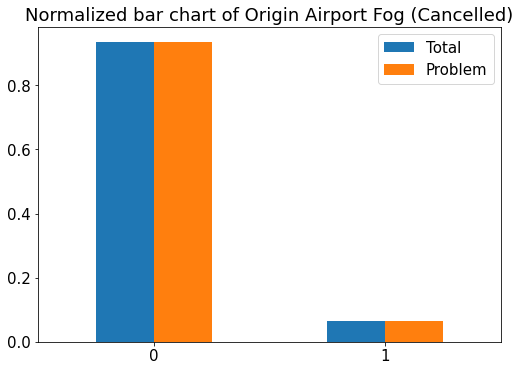

In [41]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='ORIGIN_FOG',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Origin Airport Fog (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

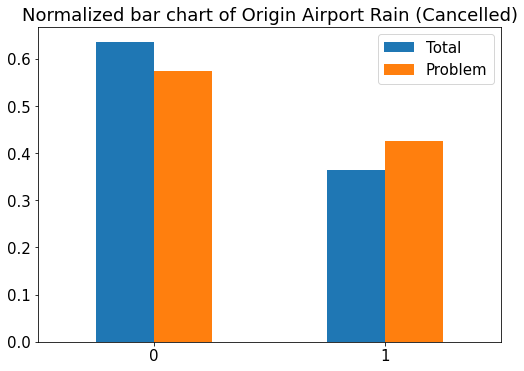

In [42]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='ORIGIN_RAIN',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Origin Airport Rain (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

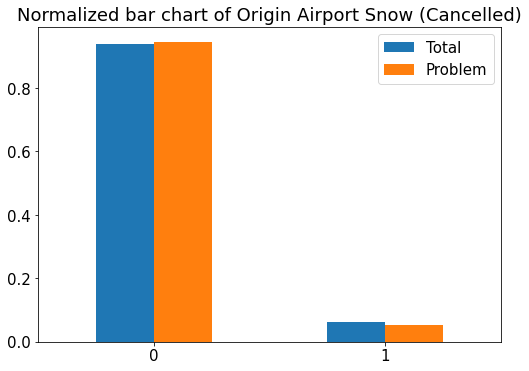

In [43]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='ORIGIN_SNOW',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Origin Airport Snow (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

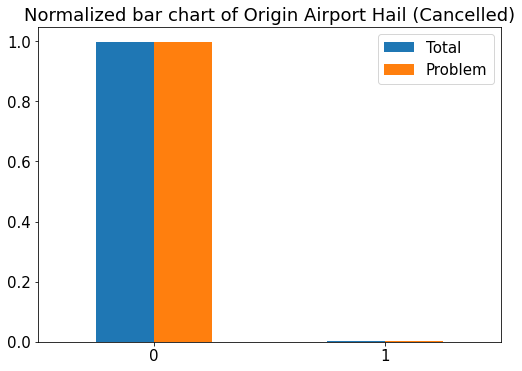

In [44]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='ORIGIN_HAIL',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Origin Airport Hail (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

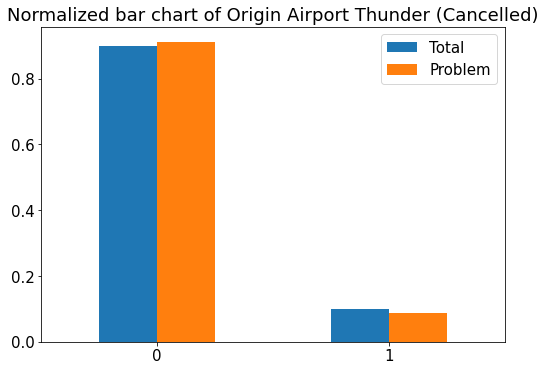

In [45]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='ORIGIN_THUNDER',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Origin Airport Thunder (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

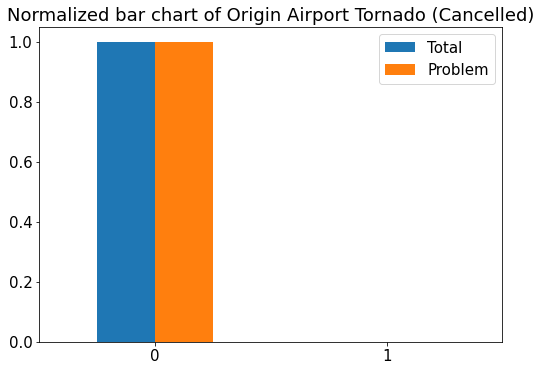

In [46]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='ORIGIN_TORNADO',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Origin Airport Tornado (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

## Destination Airport Weather

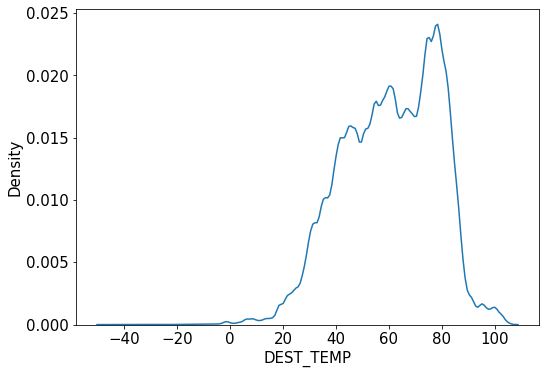

In [47]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df[df['DEST_TEMP'] != 9999.9]['DEST_TEMP'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Destination Airport Temperature Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [48]:
df.drop(df[df['DEST_TEMP'] > 120.].index, inplace=True)
cancelled_df.drop(
    cancelled_df[cancelled_df['DEST_TEMP'] > 120.].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


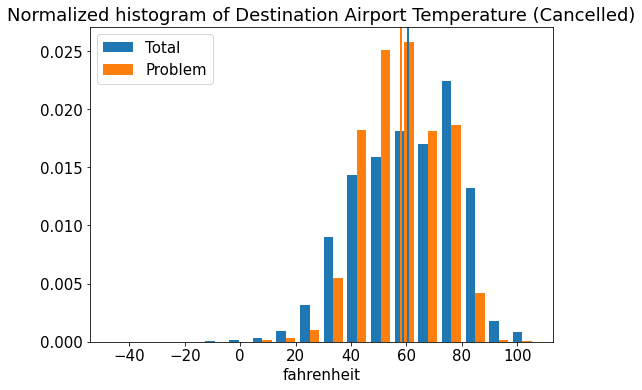

In [49]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='DEST_TEMP',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Destination Airport Temperature (Cancelled)',
                          xlabel='fahrenheit',
                          save=True,
                          path='./imgs',
                          show=True)

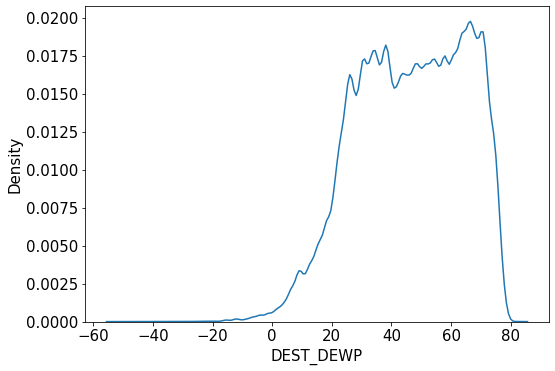

In [50]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df[df['DEST_DEWP'] != 9999.9]['DEST_DEWP'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Destination Airport Dew Point Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [51]:
df.drop(df[df['DEST_DEWP'] > 120.].index, inplace=True)
cancelled_df.drop(
    cancelled_df[cancelled_df['DEST_DEWP'] > 120.].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


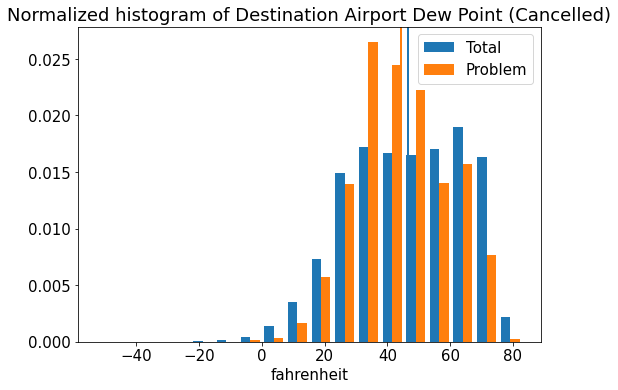

In [52]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='DEST_DEWP',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Destination Airport Dew Point (Cancelled)',
                          xlabel='fahrenheit',
                          save=True,
                          path='./imgs',
                          show=True)

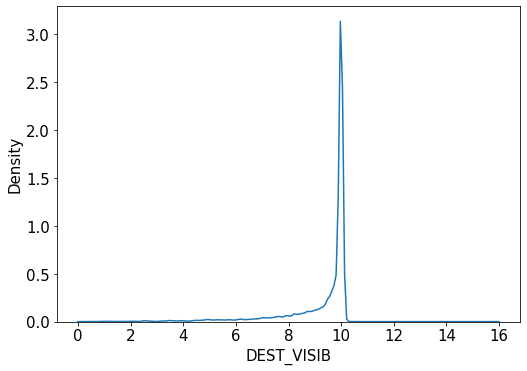

In [53]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df[df['DEST_VISIB'] != 999.9]['DEST_VISIB'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Destination Airport Visibility Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [54]:
df.drop(df[(df['DEST_VISIB'] > 18.) | (
    df['DEST_VISIB'] < 2.)].index, inplace=True)
cancelled_df.drop(cancelled_df[(cancelled_df['DEST_VISIB'] > 18.) | (
    cancelled_df['DEST_VISIB'] < 2.)].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


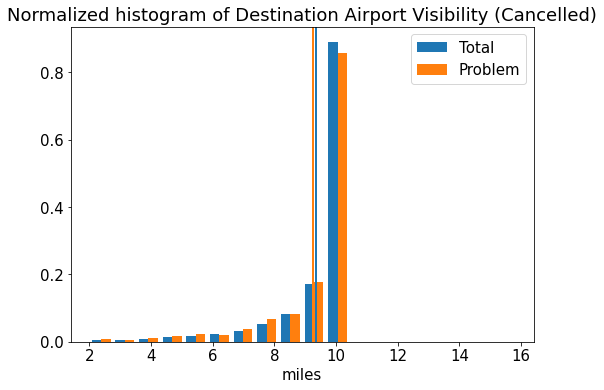

In [55]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='DEST_VISIB',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Destination Airport Visibility (Cancelled)',
                          xlabel='miles',
                          save=True,
                          path='./imgs',
                          show=True)

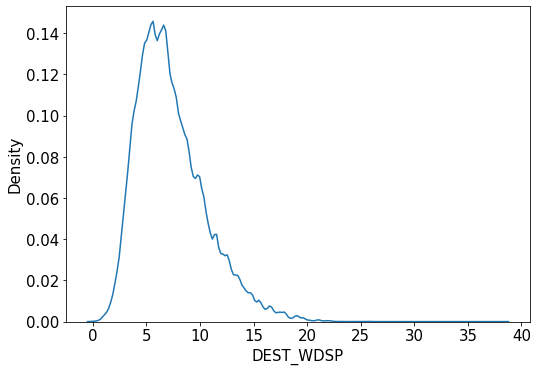

In [56]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df[df['DEST_WDSP'] != 999.9]['DEST_WDSP'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Destination Airport Wind Speed Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [57]:
df.drop(df[df['DEST_WDSP'] > 38.].index, inplace=True)
cancelled_df.drop(
    cancelled_df[cancelled_df['DEST_WDSP'] > 38.].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


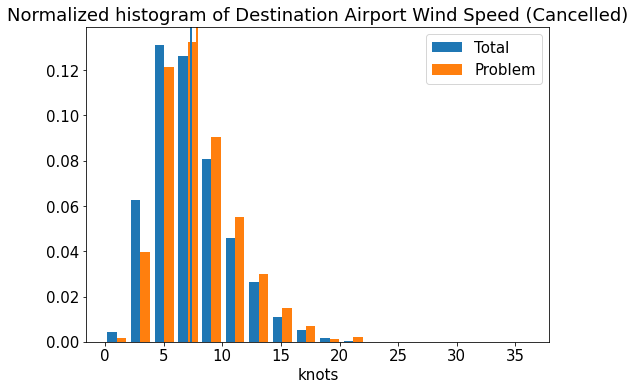

In [58]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='DEST_WDSP',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Destination Airport Wind Speed (Cancelled)',
                          xlabel='knots',
                          save=True,
                          path='./imgs',
                          show=True)

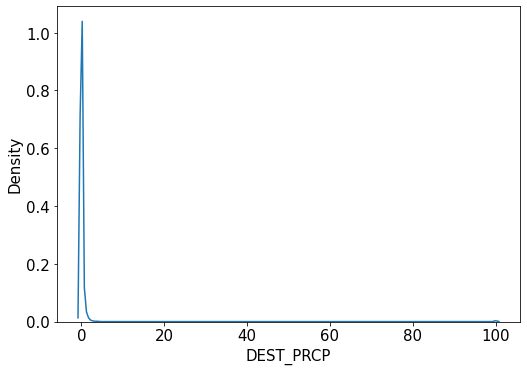

In [59]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df[df['DEST_PRCP'] != 99.9]['DEST_PRCP'])

if not os.path.exists(os.path.join('./imgs')):
    os.mkdir('./imgs')
img_path = os.path.join(
    './imgs', 'Destination Airport Total precipitation Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [60]:
df.drop(df[df['DEST_PRCP'] > 88.].index, inplace=True)
cancelled_df.drop(
    cancelled_df[cancelled_df['DEST_PRCP'] > 88.].index, inplace=True)

C:\Users\Hoang-Nhan Nguyen\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


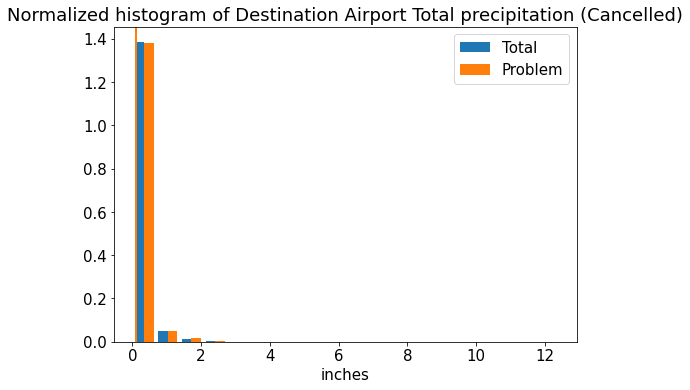

In [61]:
plot_normalized_histogram(df1=df,
                          df2=cancelled_df,
                          feature='DEST_PRCP',
                          nb_bins=18,
                          vertical_lines=True,
                          figsize=(8.3, 5.8),
                          title='Normalized histogram of Destination Airport Total precipitation (Cancelled)',
                          xlabel='inches',
                          save=True,
                          path='./imgs',
                          show=True)

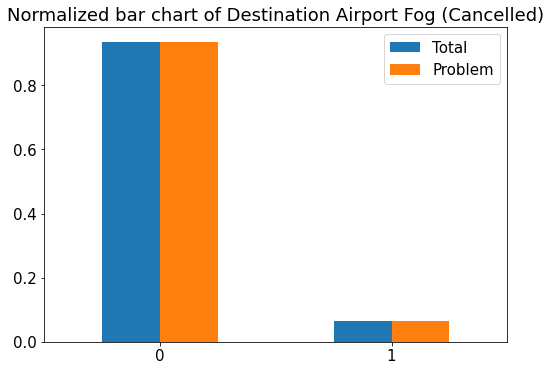

In [62]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='DEST_FOG',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Destination Airport Fog (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

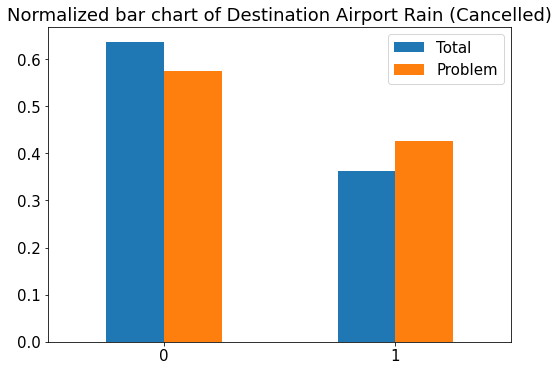

In [63]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='DEST_RAIN',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Destination Airport Rain (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

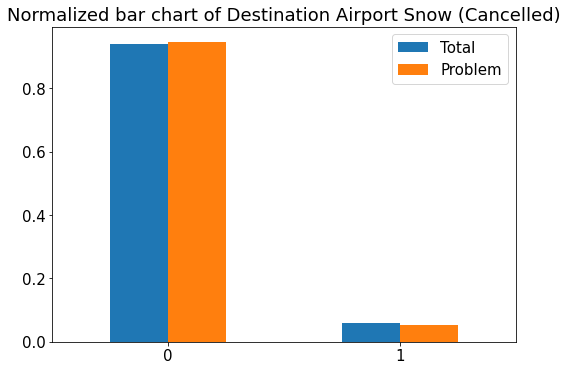

In [64]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='DEST_SNOW',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Destination Airport Snow (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

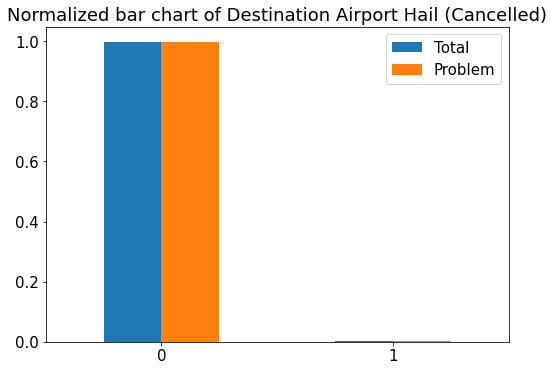

In [65]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='DEST_HAIL',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Destination Airport Hail (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

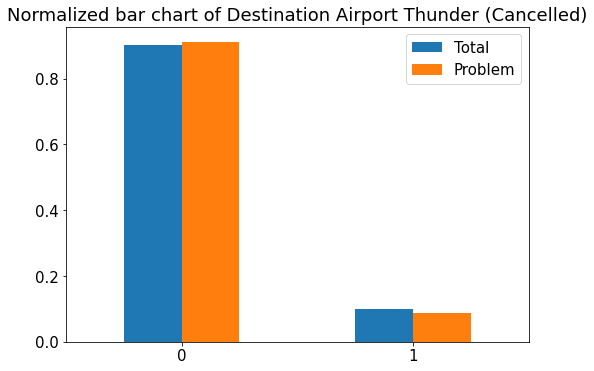

In [66]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='DEST_THUNDER',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Destination Airport Thunder (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

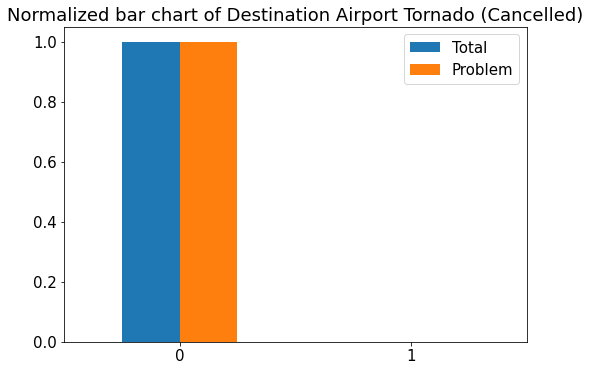

In [67]:
plot_normalized_bar_chart(df1=df,
                          df2=cancelled_df,
                          feature='DEST_TORNADO',
                          nb_bins=None,
                          index=None,
                          figsize=(8.3, 5.8),
                          rot=0,
                          title='Normalized bar chart of Destination Airport Tornado (Cancelled)',
                          xlabel=None,
                          save=True,
                          path='./imgs',
                          show=True)

## Pandemic

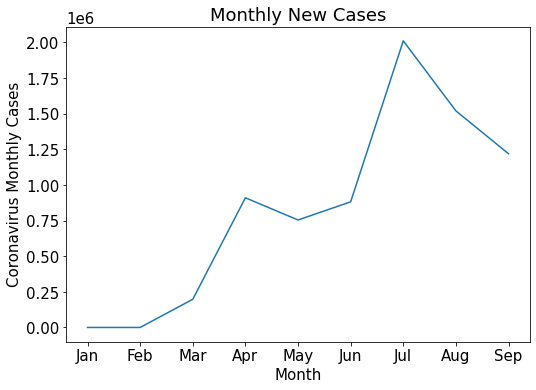

In [68]:
index = [
    'Jan', 'Feb', 'Mar',
    'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep'
]

pandemic_df = df[['MONTH', 'DAY_OF_MONTH', 'DAILY_CASES']].drop_duplicates()
pandemic_data = pandemic_df['DAILY_CASES'].groupby(df['MONTH']).sum()
pandemic_data.index = index
pandemic_data.plot(figsize=(8.3, 5.8),
                   rot=0)
plt.title('Monthly New Cases')
plt.ylabel('Coronavirus Monthly Cases')
plt.xlabel('Month')
img_path = os.path.join('./imgs', 'Monthly New Cases.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [69]:
df['BEGINNING_OF_OUTBREAK'] = np.where(
    (df['MONTH'] == 3) | (df['MONTH'] == 4), 1., 0.)
df = df.astype({'BEGINNING_OF_OUTBREAK': object})

# Delay

In [70]:
categorical_features = []
continuous_features = []

for feature in df.columns:
    if df[feature].dtype == 'O':
        categorical_features.append(feature)
    else:
        continuous_features.append(feature)

## Aircraft Carrier

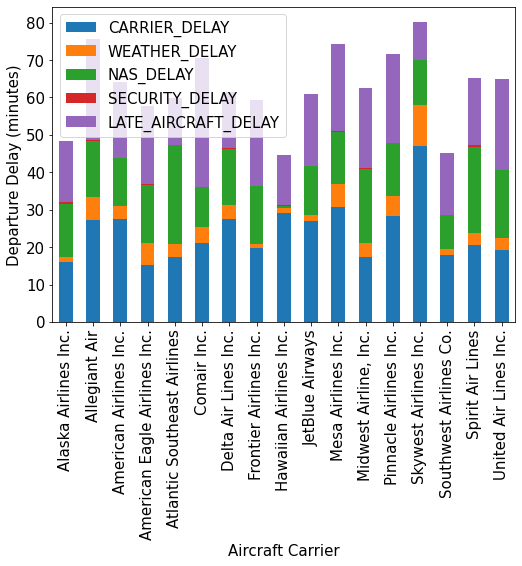

In [71]:
carrier = delayed_df.groupby('OP_UNIQUE_CARRIER')['CARRIER_DELAY'].mean()
weather = delayed_df.groupby('OP_UNIQUE_CARRIER')['WEATHER_DELAY'].mean()
nas = delayed_df.groupby('OP_UNIQUE_CARRIER')['NAS_DELAY'].mean()
security = delayed_df.groupby('OP_UNIQUE_CARRIER')['SECURITY_DELAY'].mean()
aircraft = delayed_df.groupby('OP_UNIQUE_CARRIER')[
    'LATE_AIRCRAFT_DELAY'].mean()

font = {'size': 15}
plt.rc('font', **font)

pd.DataFrame([carrier, weather, nas, security, aircraft]).transpose().plot(kind='bar',
                                                                           figsize=(
                                                                               8.3, 5.8),
                                                                           legend=True,
                                                                           rot=90,
                                                                           stacked=True)

plt.ylabel('Departure Delay (minutes)')
plt.xlabel('Aircraft Carrier')

img_path = os.path.join('./imgs', 'Aircraft Carrier Delayed.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

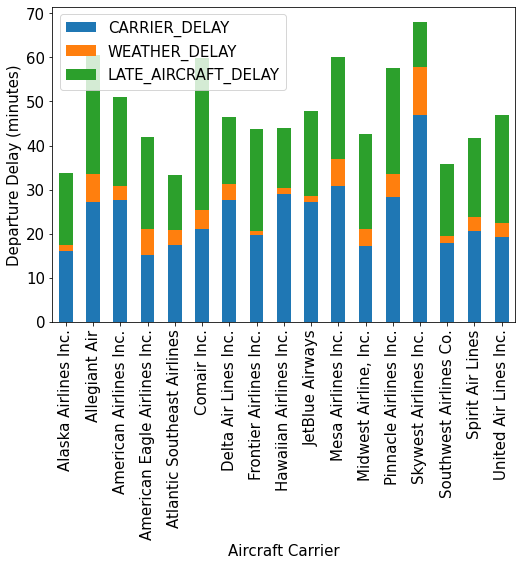

In [72]:
pd.DataFrame([carrier, weather, aircraft]).transpose().plot(kind='bar',
                                                            figsize=(
                                                                8.3, 5.8),
                                                            legend=True,
                                                            rot=90,
                                                            stacked=True)

plt.ylabel('Departure Delay (minutes)')
plt.xlabel('Aircraft Carrier')

img_path = os.path.join('./imgs', 'Minimized Aircraft Carrier Delayed.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

## Total Delay

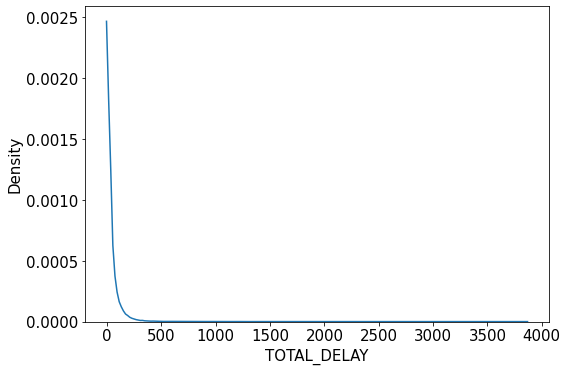

In [73]:
plt.figure(figsize=(8.3, 5.8))
sns.kdeplot(df['TOTAL_DELAY'])

img_path = os.path.join('./imgs', 'Total Delay Distribution.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [74]:
df.drop(df[df['TOTAL_DELAY'] > 300.].index, inplace=True)

## Correlation Heatmap

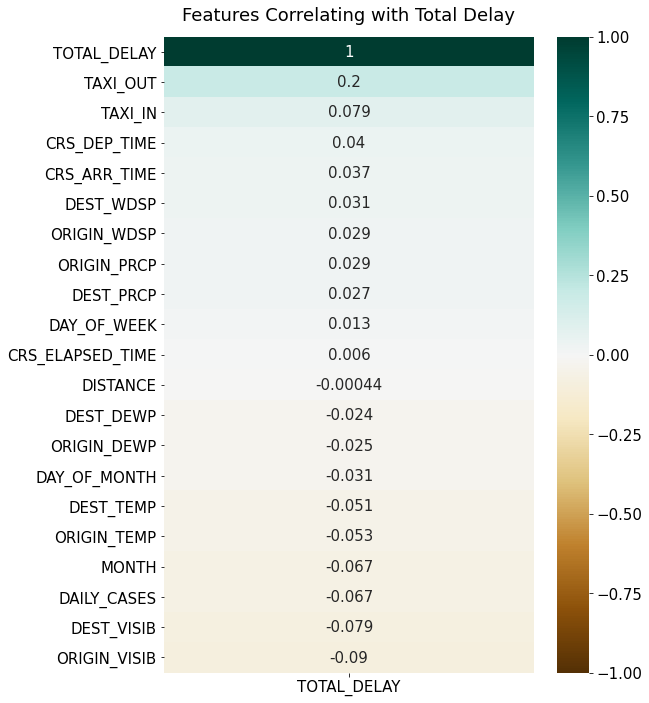

In [75]:
plt.figure(figsize=(8.3, 11.7))
heatmap = sns.heatmap(df[continuous_features].corr()[['TOTAL_DELAY']].sort_values(
    by='TOTAL_DELAY', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Total Delay',
                  fontdict={'fontsize': 18}, pad=16)

img_path = os.path.join('./imgs', 'Correlation Heatmap.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

## Continuous features

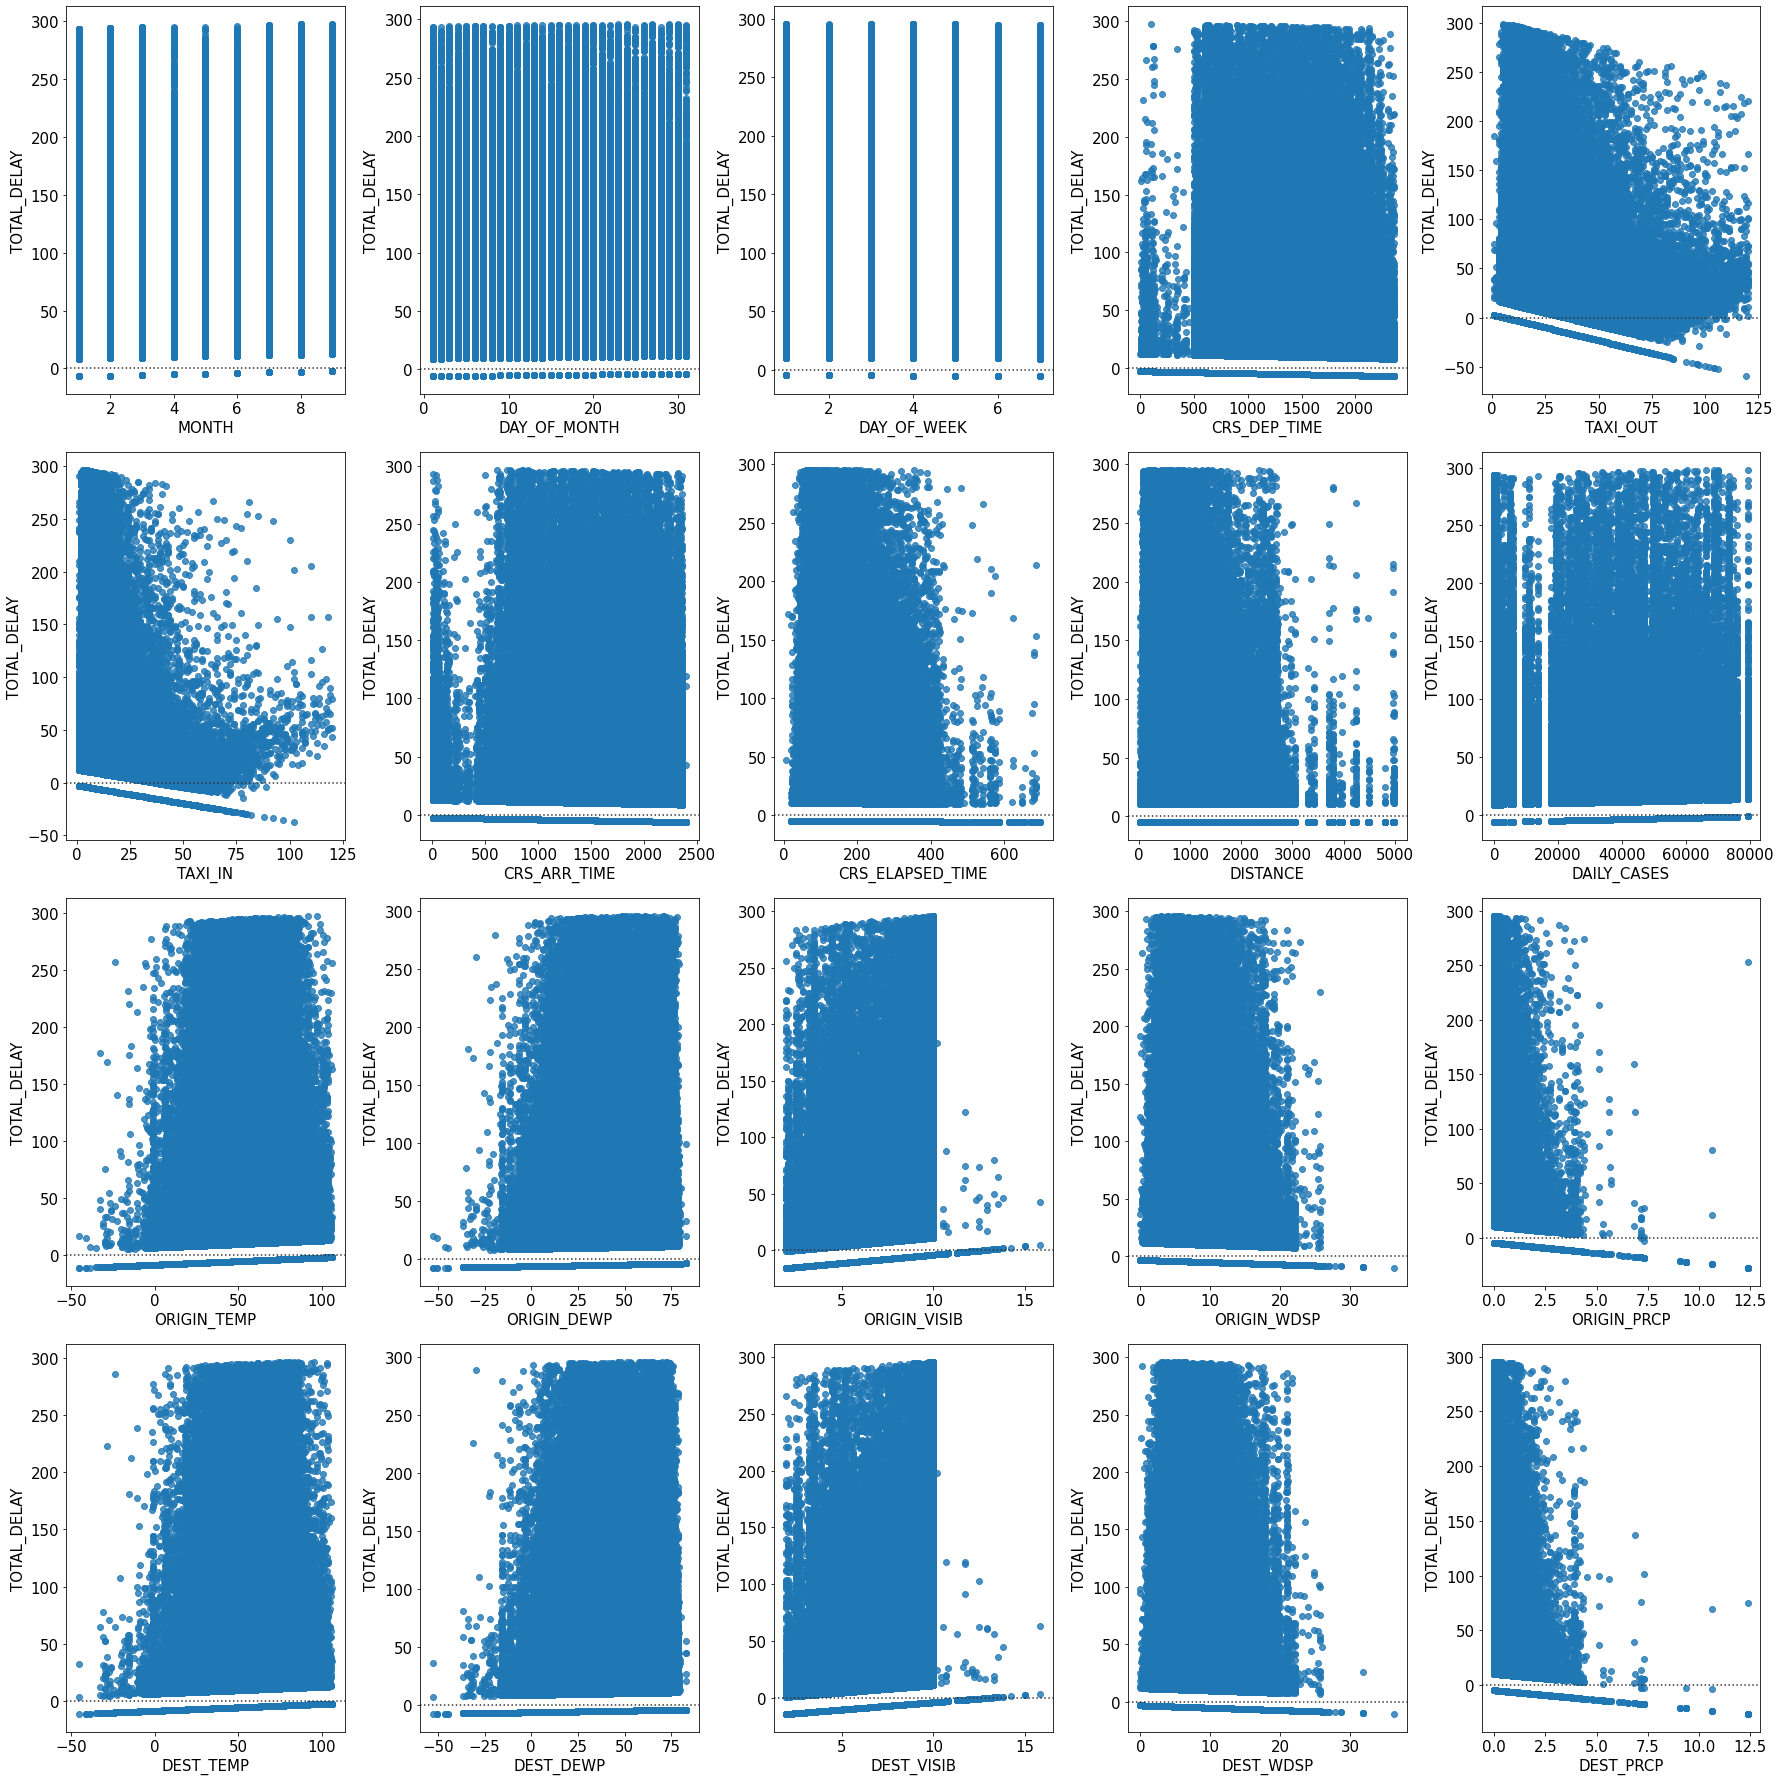

In [76]:
row = 4
col = 5
idx = 1
plt.figure(figsize=(25, 25))

for feature in continuous_features[:-1]:
    plt.subplot(row, col, idx)
    sns.residplot(x=feature, y='TOTAL_DELAY', data=df)
    idx += 1

img_path = os.path.join('./imgs', 'Residual Plot.jpg')
plt.tight_layout()
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

## Categorical features

In [77]:
f_test = []
p_value = []
for feature in categorical_features:
    df_anova = df[[feature, 'TOTAL_DELAY']]
    grouped_anova = df_anova.groupby([feature])
    group_list = []
    for key in grouped_anova.groups.keys():
        group_list.append(grouped_anova.get_group(key)['TOTAL_DELAY'])
    anova_result = stats.f_oneway(*group_list)
    f_test.append(anova_result[0])
    p_value.append(anova_result[1])

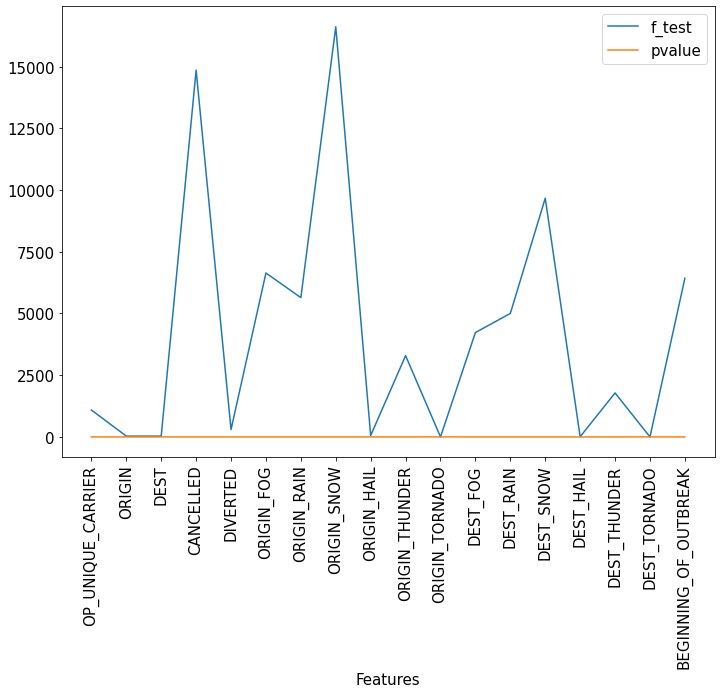

In [78]:
plt.figure(figsize=(11.7, 8.3))
plt.plot(categorical_features, f_test, label='f_test')
plt.plot(categorical_features, p_value, label='pvalue')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel('Features')
plt.legend()
img_path = os.path.join('./imgs', 'One-way Anova.jpg')
plt.savefig(img_path, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [79]:
df.dropna(inplace=True)
df.to_csv(os.path.join('./Data', 'processed_data.csv'), index=False)